In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Gensim
from gensim.corpora.dictionary import Dictionary

IMPORT DATA

In [5]:
df = pd.read_csv('bow_df.csv')
# 결측치 제거
df = df.dropna()

company_name = df.company_name
other_var = df.drop(['company_name','adv','dadv','Unnamed: 0'],axis=1)
company_name

0        국민건강보험공단
1          근로복지공단
2            농협은행
3            현대카드
4          중소기업은행
          ...    
2498     유끼커뮤니케이션
2499         투어이천
2500         휴먼코아
2501    에이치엔씨네트워크
2502        현대엔지비
Name: company_name, Length: 2503, dtype: object

In [44]:
# # only for It data
# it1 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_1_100.csv')
# it2 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_101_200.csv')
# it3 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_201_300.csv')
# it4 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_300_end.csv')

# df= pd.concat([it1,it2,it3,it4],axis=0)
# df.index= [i for i in range(563)]
# # 결측치 제거
# df = df.dropna()
# adv = df['adv'] # Advantage review
# dadv = df['dadv'] # Disadvantage review
# df.head()

TOKENIZING

In [6]:
# Word Count
from konlpy.tag import Okt

t = Okt()

def my_tokenizer(doc):
    return [
        token
        for token, pos in t.pos(doc)
        if pos in ['Noun','Verb','Adjective'] and len(token)>1
    ]

In [7]:
text_adv = [my_tokenizer(text) for text in df.adv]
text_dadv = [my_tokenizer(text) for text in df.dadv]

In [9]:
dictionary_adv = Dictionary(text_adv)
dictionary_dadv = Dictionary(text_dadv)
print('#Number of initial unique words in adv_documents:',len(dictionary_adv))
print('#Number of initial unique words in dadv_documents:',len(dictionary_dadv))

dictionary_adv.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)
dictionary_dadv.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)

print("#Number of unique words after removing rae and common words:", len(dictionary_adv))
print("#Number of unique words after removing rae and common words:", len(dictionary_dadv))

corpus_adv = [dictionary_adv.doc2bow(text) for text in text_adv]
corpus_dadv = [dictionary_dadv.doc2bow(text) for text in text_dadv]
print('#Number of unique tokens: %d' % len(dictionary_adv))
print('#Number of documents: %d' % len(corpus_adv))

print('#Number of unique tokens: %d' % len(dictionary_dadv))
print('#Number of documents: %d' % len(corpus_dadv))


#Number of initial unique words in adv_documents: 44973
#Number of initial unique words in dadv_documents: 75796
#Number of unique words after removing rae and common words: 2000
#Number of unique words after removing rae and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 2503
#Number of unique tokens: 2000
#Number of documents: 2503


LDA MODEL

In [25]:
from gensim.models import LdaModel

num_topics_adv = 9
passes = 5
model_adv = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = num_topics_adv,random_state = 7)

In [26]:
num_topics_dadv = 7
model_dadv = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = num_topics_dadv,random_state = 7)

In [27]:
print('ADV')
print(model_adv.print_topics(num_words=10))
print('\n DADV')
print(model_dadv.print_topics(num_words=10))
# print('#topic distribution of the first document:',model.get_document_topics(corpus)[0])

ADV
[(0, '0.011*"공공기관" + 0.010*"서울" + 0.009*"안정" + 0.009*"유연근무제" + 0.008*"부바" + 0.007*"육아휴직" + 0.007*"공기업" + 0.006*"정년" + 0.006*"강도" + 0.006*"유연"'), (1, '0.015*"점심" + 0.011*"저녁" + 0.010*"높은" + 0.007*"식당" + 0.007*"업계" + 0.007*"아침" + 0.007*"기숙사" + 0.007*"초봉" + 0.007*"버스" + 0.006*"수당"'), (2, '0.018*"데이" + 0.018*"금요일" + 0.012*"높은" + 0.011*"리프" + 0.010*"패밀리" + 0.008*"제도" + 0.007*"포인트" + 0.007*"한번" + 0.007*"제품" + 0.007*"여름"'), (3, '0.017*"재택근무" + 0.010*"재택" + 0.008*"동료" + 0.008*"기회" + 0.007*"사내" + 0.007*"업계" + 0.007*"프로젝트" + 0.007*"자율" + 0.006*"사무실" + 0.006*"팀바팀"'), (4, '0.011*"점심" + 0.010*"버스" + 0.009*"통근" + 0.007*"강도" + 0.006*"수당" + 0.006*"파견" + 0.006*"정시" + 0.006*"저녁" + 0.005*"딱히" + 0.005*"없고"'), (5, '0.015*"커피" + 0.014*"카페" + 0.014*"건물" + 0.012*"점심" + 0.011*"간식" + 0.011*"사내" + 0.010*"사옥" + 0.010*"식대" + 0.008*"할인" + 0.007*"사무실"'), (6, '0.016*"대기업" + 0.014*"안정" + 0.007*"높은" + 0.007*"사업" + 0.007*"영업" + 0.006*"수준" + 0.006*"성과급" + 0.006*"현장" + 0.006*"괜찮은" + 0.006*"강도"'), (7, '0.009*"포인트" + 0.

TOPIC MODELING COMPARISON(based on # topics)

In [24]:
# # topic_modeling csv file
# num_topic_list_adv = [9]
# num_topic_list_dadv = [7]

# save_adv = {}
# save_dadv = {}
# for i in num_topic_list_adv:
#     model = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = i,random_state = 7)
#     save_adv[i] = model.print_topics(num_words=8)

# for i in num_topic_list_dadv:
#     model = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = i,random_state = 7)
#     save_dadv[i] = model.print_topics(num_words=8)

# topic_adv_csv = pd.DataFrame.from_dict(save_adv, orient='index')
# topic_adv_csv.to_csv("adv_topic_selection.csv")

# topic_dadv_csv = pd.DataFrame.from_dict(save_dadv, orient='index')
# topic_dadv_csv.to_csv("dadv_topic_selection.csv")

TOPIC MODELING OUTPUT

In [28]:
output_df_adv = pd.DataFrame({'company_name':df.company_name})
for col in range(num_topics_adv):
    tmp = str(col)
    output_df_adv[tmp] = float(0)
output_df_adv.index = [i for i in range(len(output_df_adv))]


In [29]:
output_df_dadv = pd.DataFrame({'company_name':df.company_name})
for col in range(num_topics_dadv):
    tmp = str(col)
    output_df_dadv[tmp] = float(0)
output_df_dadv.index = [i for i in range(len(output_df_dadv))]


In [30]:
for i, dt in enumerate(model_adv.get_document_topics(corpus_adv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_adv.at[i,idx] = pt

In [31]:
for i, dt in enumerate(model_dadv.get_document_topics(corpus_dadv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_dadv.at[i,idx] = pt

In [32]:
# to csv file
output_df_adv.to_csv('adv_topic_modeling.csv')
output_df_dadv.to_csv('dadv_topic_modeling.csv')

In [20]:
from gensim.models import CoherenceModel

cm_adv = CoherenceModel(model= model_adv, corpus= corpus_adv, coherence= 'u_mass')
cm_dadv = CoherenceModel(model= model_dadv, corpus= corpus_dadv, coherence= 'u_mass')

coherence_adv = cm_adv.get_coherence()
coherence_dadv = cm_dadv.get_coherence()

print(coherence_adv)
print(coherence_dadv)

-0.868110056058937
-0.7752356191175316


num_topics: 3, perplexity: -7.070, coherence: -0.848
num_topics: 4, perplexity: -7.068, coherence: -0.762
num_topics: 5, perplexity: -7.074, coherence: -0.774
num_topics: 6, perplexity: -7.072, coherence: -0.796
num_topics: 7, perplexity: -7.074, coherence: -0.803
num_topics: 8, perplexity: -7.080, coherence: -0.766
num_topics: 9, perplexity: -7.084, coherence: -0.744
num_topics: 10, perplexity: -7.086, coherence: -0.757
num_topics: 11, perplexity: -7.086, coherence: -0.770
num_topics: 12, perplexity: -7.094, coherence: -0.801
num_topics: 13, perplexity: -7.096, coherence: -0.790
num_topics: 14, perplexity: -7.105, coherence: -0.832
num_topics: 15, perplexity: -7.110, coherence: -0.798
num_topics: 16, perplexity: -7.117, coherence: -0.803


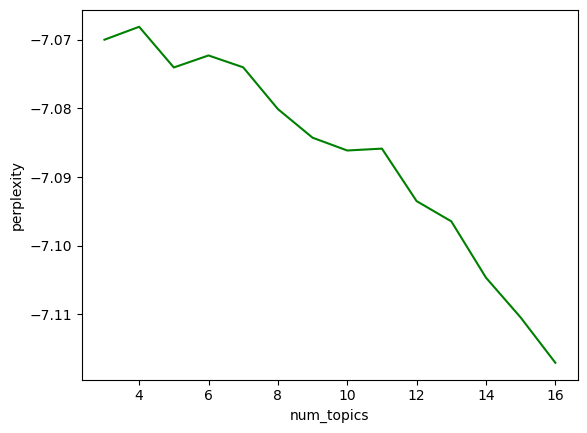

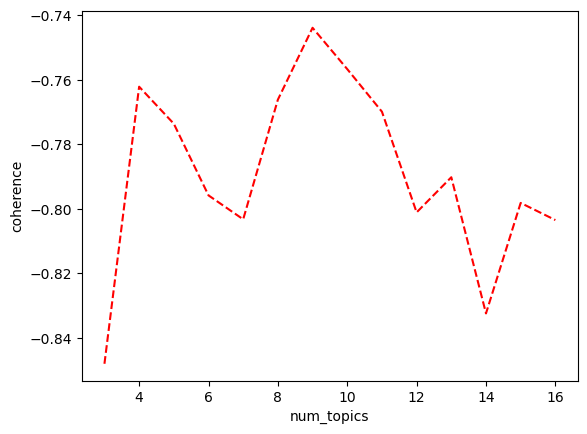

In [22]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end+1):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize=1000, num_topics = i,random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()
# 5, 14
show_coherence(corpus_adv, dictionary_adv, start = 3, end = 16)

num_topics: 3, perplexity: -7.207, coherence: -0.663
num_topics: 4, perplexity: -7.211, coherence: -0.645
num_topics: 5, perplexity: -7.220, coherence: -0.644
num_topics: 6, perplexity: -7.225, coherence: -0.640
num_topics: 7, perplexity: -7.227, coherence: -0.624
num_topics: 8, perplexity: -7.232, coherence: -0.655
num_topics: 9, perplexity: -7.234, coherence: -0.666
num_topics: 10, perplexity: -7.239, coherence: -0.663
num_topics: 11, perplexity: -7.241, coherence: -0.676
num_topics: 12, perplexity: -7.244, coherence: -0.686
num_topics: 13, perplexity: -7.255, coherence: -0.653
num_topics: 14, perplexity: -7.258, coherence: -0.667
num_topics: 15, perplexity: -7.266, coherence: -0.642
num_topics: 16, perplexity: -7.271, coherence: -0.673


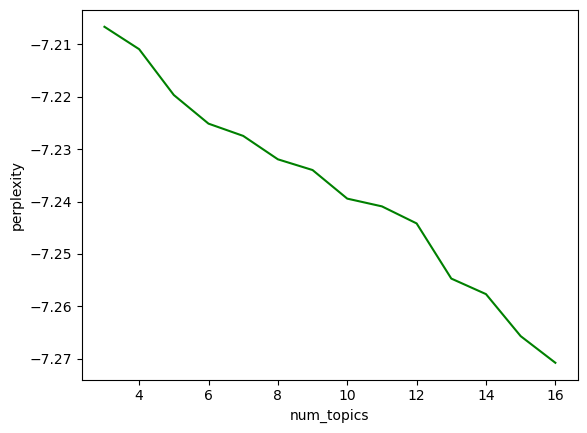

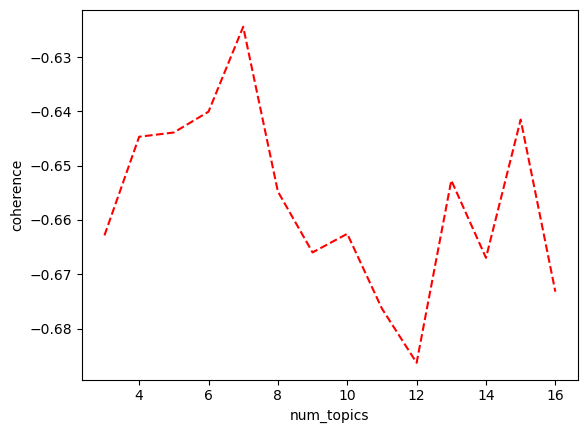

In [23]:
show_coherence(corpus_dadv, dictionary_dadv, start = 3, end = 16)
